Please provide your names, last names, and student IDs.

* name 1, last name 1, student id 1
* name 2, last name 2, student id 2 (when working in a pair)

# EVOLUTIONARY ALGORITHMS

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

In [1]:
import common as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Travelling Salesman Problem (TSP)

There are N cities. In the TSP, we are looking for a **cycle passing through all the nodes (cities)** that is the shortest. **Cycle** means that (a) each city has to be visited only once and (b) we have to go back to the start city.

Given is a distance matrix M=NxN, where $M[i][j]$ is a distance from the i-th to the j-th city.<br> 
In this exercise, we consider a symmetrical variant of TSP, i.e., $M[i][j] = M[j][i]$. Furhermore, $M[i][i] = 0$.<br> 
Let s=[3,1,...,5] be some N-element permutation of indices. <br> 
We want to find such a permutation that $\sum_{k=2,...,N}M[s[k-1]][s[k]] + M[s[N]][s[1]]$ is optimal (minimal).

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0.

# Part 1: Evolutionary algorithm

### 1.1) Evaluation

Complete the below function. It should evaluate an input solution (decision vector, vector of indices) in terms of TSP distance criterion. M is a distance matrix. Return the computed total distance.

In [15]:
def getEvaluation(solution, M):
    k = 0
    distance = 0
    for i in range(1, len(M)):
        distance += M[k][i]
        k += 1
    last_dist = M[solution[5]][solution[0]]
    distance += last_dist
    return distance
M = cm.getTutorialDistanceMatrix() ### AN EXAMPLE MATRIX
print(getEvaluation([0,1,2,3,4,5], M)) ### SHOULD BE 236.28
print(getEvaluation([5,4,3,2,1,0], M)) ### SHOULD BE THE SAME, IT IS A CYCLE :)
print(getEvaluation([0,2,1,3,5,4], M))

236.28476553372587
236.28476553372587
209.5060633450151


### 1.2) Validation

This function can be used to validate the solution, i.e., to check if a given solution vector is of a proper size and to check if each element is unique.

In [17]:
def isValid(solution, cities):
    if len(solution) != cities: return False
    s = set(solution)
    e = set([i for i in range(cities)])
    if s==e: return True
    else: return False
    
print(isValid([0,1,2,3,4,5,6], 6)) # FALSE
print(isValid([0,1,2,3,4,5], 6)) # TRUE
print(isValid([0,1,2,3,4,5,5], 6)) # FALSE
print(isValid([0,1,1,2,3,2], 6)) # FALSE

False
True
False
False


### 1.3) Initialization

We need to create a population of solutions. These solutions - initially - can be generated randomly. 
Firstly, complete getRandomSolution function (cities = the number of cities considered in the TSP problem).
It should generate a random permutation of [0,1,...,cities] vector. You can use np.random.shuffle function. Then, 
finish getInitialPopulation method. It should return a populationSize-element vector of pairs [distance, solution], where a solution is a random permutation of indices, and distance = the total distance (solution evaluation). 

In [18]:
def getRandomSolution(cities):
    s = []
    ### TODO
    for i in range(1, cities + 1):
        s.append(i)
    np.random.shuffle(s)
    return s

def getInitialPopulation(populationSize, cities, M):
    population = []
    ### TODO
    for q in range(populationSize):
        population.append(getRandomSolution(cities))
    return population

def printPopulation(population):
    for s in population:
        print(str(s[0]) + " : " + str(s[1]))

population = getInitialPopulation(10, 6, M)
printPopulation(population)

3 : 6
1 : 5
2 : 5
2 : 5
1 : 4
5 : 6
2 : 3
3 : 1
2 : 6
2 : 4


### 1.4) Sort population

The below function should sort the population according to the distance, i.e., according to the first element of each pair. These should be ordered from the smallest to the largest.You can use .sort method and a lambda function.

In [19]:
def sortPopulation(population):
    ### TODO
    population.sort()
sortPopulation(population)
printPopulation(population)

1 : 4
1 : 5
2 : 3
2 : 4
2 : 5
2 : 5
2 : 6
3 : 1
3 : 6
5 : 6


### 1.5) Summarize the population

The below function should compute minimum, mean, and maximum value of the total distances of solutions in the population. Return these statistics as [min, mean, max] vector. 

In [ ]:
def getStats(population):
    ### TODO
    return [0, 0, 0]

print(getStats(population))

### 1.6) Tournament selection of size K

You are asked to implement a tournament for parent selection (it is assumed that the population is already sorted). Firstly, complete getParentIndices method. It should return two random indices corresponding to selected parent solutions (e.g., [3, 5] etc.). Simply generate K random integers from [0,...,populationSize] and select the smallest index (as the solutions are ordered from the best to the worst). Repeat this process twice (we generate two parents) and return a vector [index1, index2]. Then, complete getMatingPool method. Usually, matingPoolSize = population size, i.e., we wish to generate an offspring population of size populationSize and thus we need to select such many pairs of parent solutions. This metod should return a vector of these pairs, e.g., [[2, 5], [9, 2], ..., [5, 7]]. 

In [ ]:
def getParentIndices(populationSize, K):
    parents = [0, 0]
    ### TODO
    return parents
    
def getMatingPool(matingPoolSize, populationSize, K):
    matingPool = []
    ### TODO
    return matingPool
     
matingPool = getMatingPool(10, 10, 2)
print(matingPool)

**Question: How does the selection depend on K? Run the below code for different K and verify your thoughts. The plot illustrates how many times a solutions of a given rank was selected by the tournament selection of size K.**

In [ ]:
def testTournament(matingPoolSize, populationSize, K):
    testMatingPool = getMatingPool(matingPoolSize, populationSize, K)
    cm.displayHistogram(plt, np, testMatingPool, populationSize)
    
testTournament(10000, 10, 1)

### 1.7) Crossover operator

Now, you are asked to implement the crossover operator. A and B are solutions (decision vectors). Let child be a new offspring solution (decision vector) and N is the number of cities.  Assume that the first N/2 elements of the child vector = the first N/2 elements of A, while the last N/2 elements of the child vector = the last N/2 elements of B. Obviously, such constructed solution may not be valid (use isValid) method. Repair this. You can, e.g., check (i) which indices are duplicated and (ii) which indices are missing. Then, you can replace one copy of each duplicate with one random missing index. 

In [ ]:
def getCrossedOver(A, B):
    child = A.copy()
    N = len(A)
    ### TODO
    return child

### TEST
print(getCrossedOver([0,1,2,3,4,5],[0,1,3,4,2,4]))

### 1.8) Mutation operator

Implement the mutation operator. Simply swap two random cities (indices). Apply this mutation with a certain probability (input argument).

In [ ]:
def mutate(solution, probability):
    if np.random.random() < probability:
        ### TODO
    
for i in range(10):
    s= [0,1,2,3,4,5]
    mutate(s, 0.9)
    print(s)

### 1.9) Create offspring

Now, combine both operators. The below method should generate the offspring. For each pair of parent indices in matingPool, i.e., [index1, index2], take the corresponding solutions from the population and apply the crossover and mutation operators in order to generate a single offspring/child. Evaluate this solution, i.e., compute the total distance. Finally, add [distance, child] to children vector.   

In [ ]:
def getOffspring(population, matingPool, mutationProbability, M):
    children = [] ### CHILDREN VECTOR
    ### TODO
    return children

### 1.10) Evolutionary Algorithm

Now, you are asked to combine all the previously completed methods into an evolutionary algorithm. This is the outline of the algorithm: <br>
1) Create & evaluate an initial population of size "populationSize" <br>
2) Sort the population <br>
3) Construct a mating pool <br>
4) Generate & evaluate an offspring of size "populationSize" <br>
5) Merge the current population and the offspring <br>
6) Sort such merged population <br>
7) Remove the worst half of the population <br>
8) Go to (2) until the stopping criterion is not meet (repeat for the assumed number of generations) <br>

In each generation, compute & display the statistics on the current population. Finally, what is the best solution found by the method? Rerun the method for different parameters (e.g., population size) and check if you can improve the result.

In [ ]:
###
costMatrix = cm.getTutorialDistanceMatrix() ### 6 CITIES
cities = 6
mutationProbability = 1.0/6.0
populationSize = 20
generations = 50

population = getInitialPopulation(populationSize, cities, costMatrix)
sortPopulation(population)

for g in range(generations):
    ### TODO
    

# Part 2: Visualization of convergence

2.1) Now, change the data set (distance matrix) to cm.getLargeDistanceMatrix. This instance concerns 15 cities. Run the evolutionary algorithm with a population size of 20 and the number of generation of 200 (and suitably adjust the mutation probability - 1.0/15.0). <br><br>
**In each generation**, store the population statistics (min, mean, and max distances found, in, respectively, Y_MIN, Y_MEAN, Y_MAX). Then, use cm.plotConvergence(plt, X, Y_MIN, Y_MEAN, Y_MAX) - use append function - to display the convergence plot. Rerun the code for different parameters and observe the results. What is the best value (distance) you could find (print)?

ValueError: 'y1' is not 1-dimensional

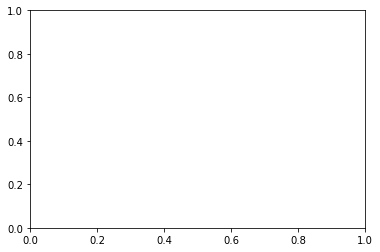

In [27]:
costMatrix = cm.getLargeDistanceMatrix() ### 15 CITIES
cities = 15
mutationProbability = 1.0/15.0
populationSize = 20
generations = 200

population = getInitialPopulation(populationSize, cities, costMatrix)
sortPopulation(population)

X = []
Y_MIN = []
Y_MEAN = []
Y_MAX = []
### TODO
for i in range(generations):
    X.append(i)
    Y_MIN.append(min(population))
    Y_MEAN.append(np.mean(population))
    Y_MAX.append(max(population))

cm.plotConvergence(plt, X, Y_MIN, Y_MEAN, Y_MAX)
print(Y_MIN[-1])

You can verify the correctness of the generated plot with some example plot provided below. Note that there obviously may be some differences between these two. 

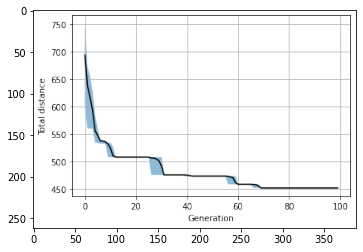

In [21]:
plt.imshow(plt.imread("sr.png"))

2.2) Each time you rerun the code, while keeping the paramet values fixed, the results my slightly change. This is due to the random nature of evolutionary algorithms. Hence, in order to get the reliable results, the method must be run several times and the results have to be averaged. Do the following:<br>
- run the method 20 times <br>
- in each run: capture **the best result found (solution)**  in each generation (so it is like taking min values in the previously generated plot) <br>
- **averaging over 20 runs:** for each generation, find min, mean, and max values <br>
- use cm.plotConvergence to display the convergence
- print the best value ever found 

In [ ]:
### TODO

You can verify the correctness of the generated plot with some example plot provided below. Note that there obviously may be some differences between these two. 

In [ ]:
plt.imshow(plt.imread("mr.png"))

# Part 3: Impact of different parameter values on the optimization

In this exercise, you are asked to check how the method performs for different parameter values. Evaluate the performance in terms of different population sizes. Specifically, check how the method performs for the population size = 5, 10, 20, and 50. Display 4 convergence plots - defined as in exercise 2.2 - in a single chart or in separate plots. **Discuss the obtained results**.

In [ ]:
### TODO